MOHAMMED AMIR 510 MNIST ALGORITHM 


In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


4


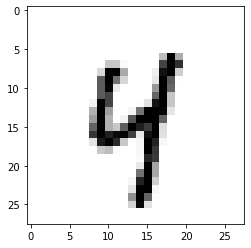

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 2222
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1923 - accuracy: 0.9427
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0806 - accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0575 - accuracy: 0.9820
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0453 - accuracy: 0.9853
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0350 - accuracy: 0.9884


In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0515 - accuracy: 0.9847


[0.051540251821279526, 0.9847000241279602]

6


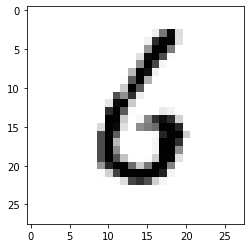

In [14]:
image_index = 50
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())